# Lab #2

First and Last Name: Muhammad Waseem

Student ID: 501038529



Dataset Snapshot:


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1



CHD Class Distribution:
chd
0    65.367965
1    34.632035
Name: proportion, dtype: float64


<ipython-input-23-ade65410bb63>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="chd", data=dataset, palette="plasma", hue=None, legend=False)


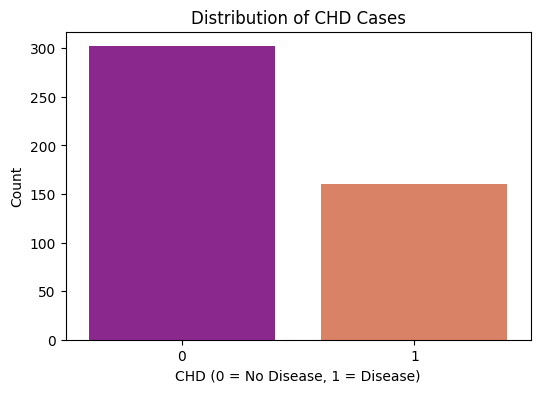


Missing Values by Column:
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

Detected Categorical Variables: 1
Categorical Feature Names: ['famhist']


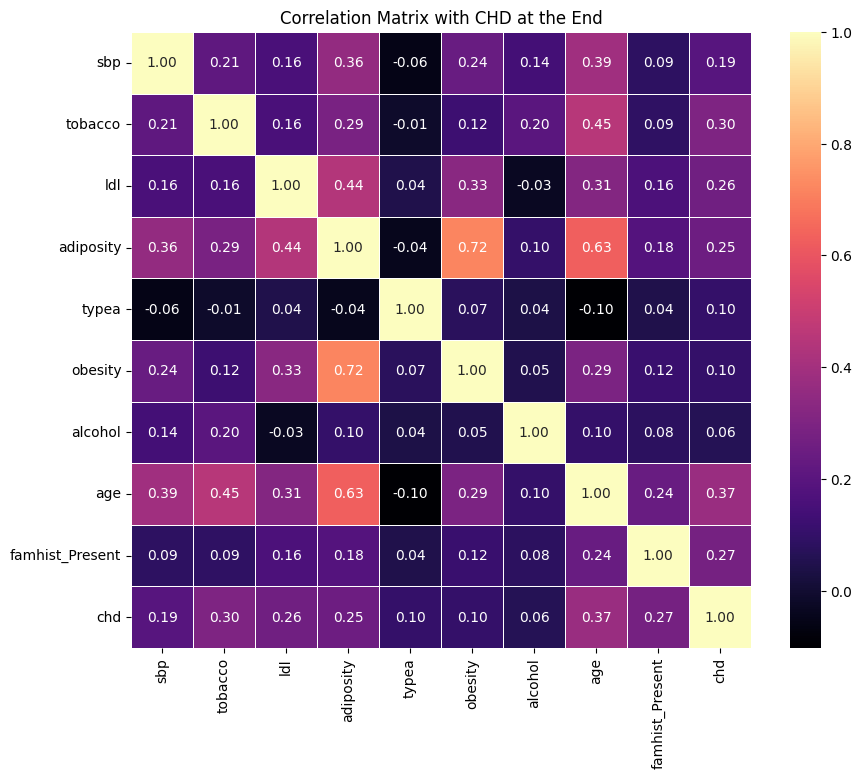


Top Features Highly Correlated with CHD:
age                0.372973
tobacco            0.299718
famhist_Present    0.272373
ldl                0.263053
adiposity          0.254121
sbp                0.192354
typea              0.103156
obesity            0.100095
alcohol            0.062531
Name: chd, dtype: float64

Sample of Standardized Features:


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,1.185854
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,-0.843274
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,1.185854
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,1.185854
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,1.185854


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset from the provided URL
data_url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
dataset = pd.read_csv(data_url)

# Drop 'row.names' column if it exists
if 'row.names' in dataset.columns:
    dataset.drop(columns=['row.names'], inplace=True)

# Preview dataset
print("Dataset Snapshot:")
display(dataset.head())

# Compute class distribution for CHD
print("\nCHD Class Distribution:")
chd_counts = dataset["chd"].value_counts(normalize=True) * 100
print(chd_counts)

# Plot CHD class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="chd", data=dataset, palette="plasma", hue=None, legend=False)
plt.title("Distribution of CHD Cases")
plt.xlabel("CHD (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

# Identify missing values in each column
print("\nMissing Values by Column:")
print(dataset.isnull().sum())

# Identify categorical features
cat_columns = dataset.select_dtypes(include=['object']).columns
print("\nDetected Categorical Variables:", len(cat_columns))
print("Categorical Feature Names:", cat_columns.tolist())

# Encode categorical variables (Convert 'famhist' into binary format)
data_encoded = pd.get_dummies(dataset, columns=['famhist'], drop_first=True)

# Rearranging columns to move 'chd' to the last position
ordered_columns = [col for col in data_encoded.columns if col != 'chd'] + ['chd']
data_encoded = data_encoded[ordered_columns]

# Compute correlation matrix and format it properly
corr_matrix = data_encoded.corr()
corr_matrix = corr_matrix.reindex(index=ordered_columns, columns=ordered_columns)

# Create a heatmap of feature correlations with adjusted color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="magma", linewidths=0.5)
plt.title("Correlation Matrix with CHD at the End")
plt.show()

# Determine the features most correlated with CHD
chd_corr = corr_matrix["chd"].drop("chd").abs().sort_values(ascending=False)
print("\nTop Features Highly Correlated with CHD:")
print(chd_corr)

# Standardization: Normalize numerical features excluding 'chd'
features_X = data_encoded.drop(columns=["chd"])
target_y = data_encoded["chd"]

scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(features_X), columns=features_X.columns)

# Display a sample of the standardized dataset
print("\nSample of Standardized Features:")
display(X_standardized.head())


Batch Gradient Descent (lr=0.001, epochs=500):
  θ_0: 0.281897
  θ_1: 0.894844
  θ_2: 0.703882
  θ_3: 0.577677
  θ_4: 0.107648
  θ_5: 0.176685
  θ_6: 0.014887
  θ_7: 0.809192
  θ_8: 0.563451
  θ_9: 0.688677
--------------------------------------------------
Batch Gradient Descent (lr=0.001, epochs=1000):
  θ_0: 0.194373
  θ_1: 0.840993
  θ_2: 0.676911
  θ_3: 0.558531
  θ_4: 0.065589
  θ_5: 0.195447
  θ_6: -0.022743
  θ_7: 0.753013
  θ_8: 0.530198
  θ_9: 0.669522
--------------------------------------------------
Batch Gradient Descent (lr=0.001, epochs=10000):
  θ_0: -0.626960
  θ_1: 0.305003
  θ_2: 0.435659
  θ_3: 0.426779
  θ_4: -0.051276
  θ_5: 0.315623
  θ_6: -0.173186
  θ_7: 0.116864
  θ_8: 0.447198
  θ_9: 0.479570
--------------------------------------------------
Batch Gradient Descent (lr=0.0001, epochs=500):
  θ_0: 0.365049
  θ_1: 0.945046
  θ_2: 0.729137
  θ_3: 0.596480
  θ_4: 0.150898
  θ_5: 0.158149
  θ_6: 0.053513
  θ_7: 0.860450
  θ_8: 0.597154
  θ_9: 0.706128
-----------

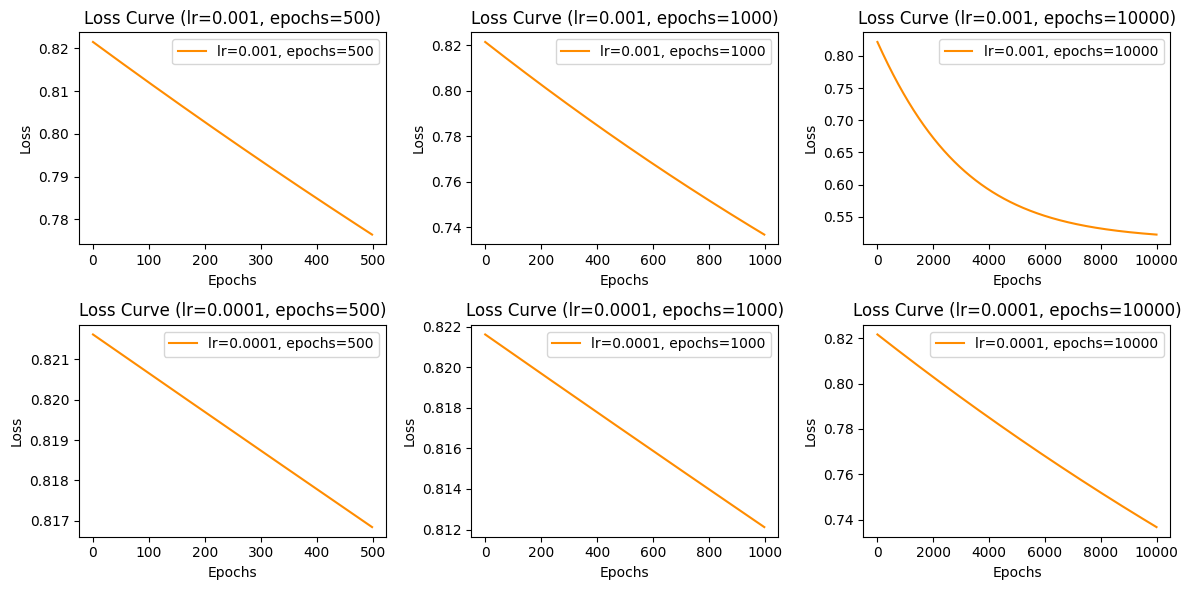

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset from URL
data_url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
dataset = pd.read_csv(data_url)

# Remove unnecessary 'row.names' column if present
if 'row.names' in dataset.columns:
    dataset.drop(columns=['row.names'], inplace=True)

# Encode categorical variable ('famhist' as binary: 1 for Present, 0 for Absent)
dataset_encoded = pd.get_dummies(dataset, columns=['famhist'], drop_first=True)

# Reorder columns to ensure 'chd' is at the end
ordered_columns = [col for col in dataset_encoded.columns if col != 'chd'] + ['chd']
dataset_encoded = dataset_encoded[ordered_columns]

# Separate features and target variable
features = dataset_encoded.drop(columns=["chd"])
target = dataset_encoded["chd"]

# Standardize numerical features
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Add intercept term (bias) x0 = 1
X_train = np.c_[np.ones((features_scaled.shape[0], 1)), features_scaled]
y_train = target.to_numpy().reshape(-1, 1)  # Ensure target is a column vector

# Initialize weights (theta) randomly
np.random.seed(42)
theta_init = np.random.rand(X_train.shape[1], 1)

# Define sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define binary cross-entropy loss function
def compute_loss(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    loss = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

# Implement batch gradient descent
def batch_gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    loss_history = []

    for _ in range(num_epochs):
        predictions = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (predictions - y))
        theta -= learning_rate * gradient  # Update weights
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)  # Store loss for visualization

    return theta, loss_history  # Return final weights and loss history

# Define learning rates and epochs to test
learning_rates = [0.001, 0.0001]
epoch_values = [500, 1000, 10000]

# Store final weights for each configuration
final_thetas = {}

# Plot learning curves
plt.figure(figsize=(12, 6))

for i, lr in enumerate(learning_rates):
    for j, epochs in enumerate(epoch_values):
        theta = np.copy(theta_init)  # Reset theta for each run
        theta_final, loss_history = batch_gradient_descent(X_train, y_train, theta, lr, epochs)

        # Store final theta values
        final_thetas[f"lr={lr}, epochs={epochs}"] = theta.flatten()

        # Print final weight values for first 10 indices
        print(f"Batch Gradient Descent (lr={lr}, epochs={epochs}):")
        for idx in range(min(10, theta_final.shape[0])):
            print(f"  θ_{idx}: {theta_final[idx, 0]:.6f}")
        print("-" * 50)

        # Plot loss vs. epochs
        plt.subplot(2, 3, i * 3 + j + 1)
        plt.plot(range(epochs), loss_history, label=f"lr={lr}, epochs={epochs}", color='darkorange')
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.title(f"Loss Curve (lr={lr}, epochs={epochs})")

plt.tight_layout()
plt.show()


For a learning rate of 0.001, the cost function demonstrates a steady decline and appears to converge at approximately 10,000 epochs. Beyond this point, the cost reduction is minimal, indicating that further training would not significantly improve the model.

For a learning rate of 0.0001, the cost function decreases at a much slower rate, and even after 10,000 epochs, it does not fully converge. This suggests that the model requires significantly more epochs to reach an optimal solution, meaning training should continue beyond 10,000 epochs for better convergence.

Mini-Batch Gradient Descent (lr=0.001, epochs=500):
  θ_0: -0.3260
  θ_1: 0.5026
  θ_2: 0.5157
  θ_3: 0.4630
  θ_4: -0.0832
  θ_5: 0.2820
  θ_6: -0.1645
  θ_7: 0.3669
  θ_8: 0.4073
  θ_9: 0.5458
--------------------------------------------------
Mini-Batch Gradient Descent (lr=0.001, epochs=1000):
  θ_0: -0.6263
  θ_1: 0.3037
  θ_2: 0.4354
  θ_3: 0.4268
  θ_4: -0.0499
  θ_5: 0.3143
  θ_6: -0.1716
  θ_7: 0.1160
  θ_8: 0.4468
  θ_9: 0.4769
--------------------------------------------------
Mini-Batch Gradient Descent (lr=0.001, epochs=10000):
  θ_0: -0.8783
  θ_1: 0.1328
  θ_2: 0.3626
  θ_3: 0.3602
  θ_4: 0.1344
  θ_5: 0.3870
  θ_6: -0.2574
  θ_7: 0.0044
  θ_8: 0.6651
  θ_9: 0.4572
--------------------------------------------------
Mini-Batch Gradient Descent (lr=0.0001, epochs=500):
  θ_0: 0.2818
  θ_1: 0.8946
  θ_2: 0.7042
  θ_3: 0.5778
  θ_4: 0.1077
  θ_5: 0.1763
  θ_6: 0.0151
  θ_7: 0.8092
  θ_8: 0.5634
  θ_9: 0.6888
--------------------------------------------------
Mini-Batch Gradi

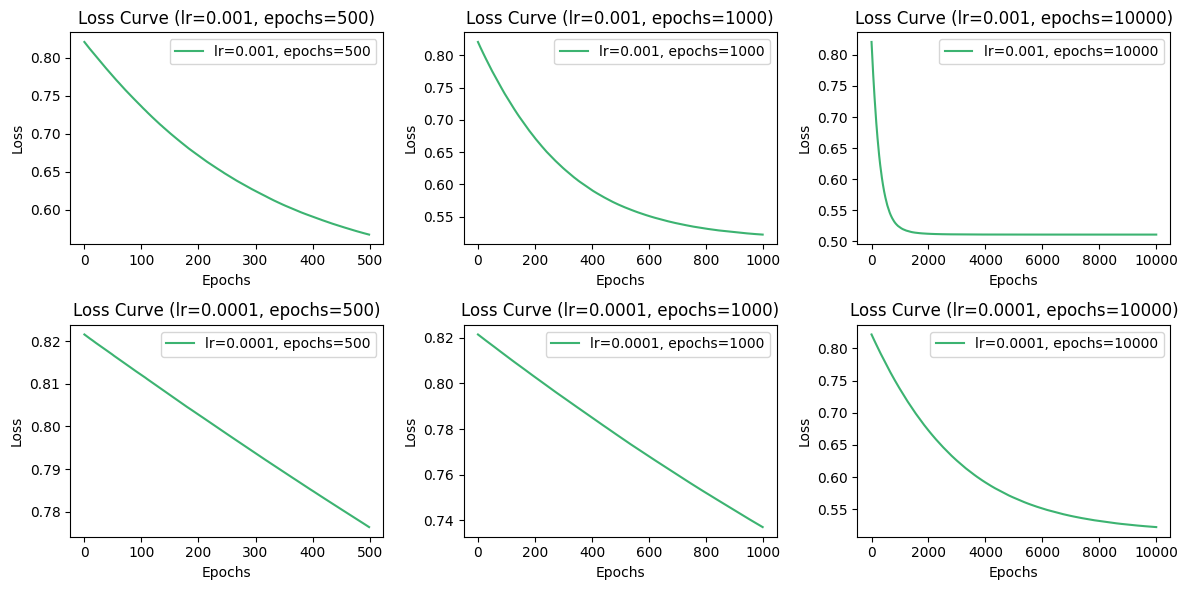

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load dataset from source
csv_url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
dataframe = pd.read_csv(csv_url)

# Remove unnecessary index column if it exists
if 'row.names' in dataframe.columns:
    dataframe.drop(columns=['row.names'], inplace=True)

# Convert categorical variable ('famhist') into binary format
encoded_df = pd.get_dummies(dataframe, columns=['famhist'], drop_first=True)

# Ensure 'chd' is the last column for consistency
column_order = [col for col in encoded_df.columns if col != 'chd'] + ['chd']
encoded_df = encoded_df[column_order]

# Feature-target separation
X_features = encoded_df.drop(columns=["chd"])  # Feature set
Y_target = encoded_df["chd"]                   # Target variable

# Normalize numerical features
scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_features), columns=X_features.columns)

# Prepare data for logistic regression training
X_train = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]  # Add bias term
Y_train = Y_target.values.reshape(-1, 1)  # Convert to column vector

# Initialize theta (weights) with random values between 0 and 1
np.random.seed(42)
theta_initial = np.random.rand(X_train.shape[1], 1)

# Define sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define binary cross-entropy loss function
def compute_loss(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    loss = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

# Implement mini-batch gradient descent algorithm
def mini_batch_gradient_descent(X, y, theta, learning_rate, num_epochs, batch_size=50):
    m = len(y)
    loss_history = []

    for epoch in range(num_epochs):
        # Shuffle dataset for randomness
        indices = np.random.permutation(m)
        X_shuffled, y_shuffled = X[indices], y[indices]

        # Iterate through mini-batches
        for i in range(0, m, batch_size):
            X_mini = X_shuffled[i:i+batch_size]
            y_mini = y_shuffled[i:i+batch_size]

            predictions = sigmoid(np.dot(X_mini, theta))
            gradient = (1 / len(y_mini)) * np.dot(X_mini.T, (predictions - y_mini))
            theta -= learning_rate * gradient  # Update weights

        # Compute loss after each epoch
        loss = compute_loss(X, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Define different learning rates and epoch values for training
learning_rates = [0.001, 0.0001]
epoch_values = [500, 1000, 10000]
batch_size = 50

# Generate learning curves
plt.figure(figsize=(12, 6))

for i, lr in enumerate(learning_rates):
    for j, epochs in enumerate(epoch_values):
        theta = np.copy(theta_initial)  # Reset theta for each experiment
        theta_final, loss_history = mini_batch_gradient_descent(X_train, Y_train, theta, lr, epochs, batch_size)

        # Display final weight values for the first 10 indices
        print(f"Mini-Batch Gradient Descent (lr={lr}, epochs={epochs}):")
        for idx in range(min(10, theta_final.shape[0])):
            print(f"  θ_{idx}: {theta_final[idx, 0]:.4f}")
        print("-" * 50)

        # Plot loss vs. epochs
        plt.subplot(2, 3, i * 3 + j + 1)
        plt.plot(range(epochs), loss_history, label=f"lr={lr}, epochs={epochs}", color='mediumseagreen')
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.title(f"Loss Curve (lr={lr}, epochs={epochs})")

plt.tight_layout()
plt.show()


For a learning rate of 0.001, the cost function demonstrates a significant reduction initially and reaches a point of minimal improvement at around 2,000 epochs, indicating convergence. Beyond this point, additional training provides negligible reductions in cost, making it reasonable to stop training.

For a learning rate of 0.0001, the convergence process is notably slower. The cost function continues to decrease gradually and reaches a stable plateau around 10,000 epochs, where further training does not significantly improve performance. At this stage, stopping training is appropriate as the model has effectively learned the optimal weights.

In [ ]:
# Import necessary library for logistic regression
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model using Scikit-Learn
logistic_model = LogisticRegression(max_iter=10000, solver='lbfgs')  # High max_iter for stability
logistic_model.fit(X_scaled, y.ravel())  # Fit model on standardized feature set

# Extract model coefficients, including the bias term (intercept)
sklearn_coefficients = np.concatenate(([logistic_model.intercept_[0]], logistic_model.coef_.flatten()))

# Display learned coefficients from Scikit-Learn
print("\nScikit-Learn Logistic Regression Coefficients (θ₀ to θ₉):")
for index in range(10):  # Displaying first 10 weights
    print(f"  θ_{index}: {sklearn_coefficients[index]:.6f}")

# Compare with manually implemented Batch & Mini-Batch Gradient Descent results
print("\nComparison with Computed Gradient Descent Weights:")
for config, weight_values in final_weights.items():  # Iterating over stored weights from custom implementation
    print(f"{config}:")
    for index in range(10):
        print(f"  θ_{index}: {weight_values[index]:.6f}")
    print("-" * 50)



Scikit-Learn Logistic Regression Coefficients (θ₀ to θ₉):
  θ_0: -0.872744
  θ_1: 0.133063
  θ_2: 0.361723
  θ_3: 0.355094
  θ_4: 0.141358
  θ_5: 0.379451
  θ_6: -0.254950
  θ_7: 0.003350
  θ_8: 0.647887
  θ_9: 0.450557

Comparison with Computed Gradient Descent Weights:
α=0.001, Epochs=500:
  θ_0: 0.281897
  θ_1: 0.894844
  θ_2: 0.703882
  θ_3: 0.577677
  θ_4: 0.107648
  θ_5: 0.176685
  θ_6: 0.014887
  θ_7: 0.809192
  θ_8: 0.563451
  θ_9: 0.688677
--------------------------------------------------
α=0.001, Epochs=1000:
  θ_0: 0.194373
  θ_1: 0.840993
  θ_2: 0.676911
  θ_3: 0.558531
  θ_4: 0.065589
  θ_5: 0.195447
  θ_6: -0.022743
  θ_7: 0.753013
  θ_8: 0.530198
  θ_9: 0.669522
--------------------------------------------------
α=0.001, Epochs=10000:
  θ_0: -0.626960
  θ_1: 0.305003
  θ_2: 0.435659
  θ_3: 0.426779
  θ_4: -0.051276
  θ_5: 0.315623
  θ_6: -0.173186
  θ_7: 0.116864
  θ_8: 0.447198
  θ_9: 0.479570
--------------------------------------------------
α=0.0001, Epochs=500:
  